In [1]:
import sys
import cv2
import os
import skimage
from skimage import io
import numpy as np
import tensorflow
import keras
import keras, keras.layers as L
sys.path.append("..")

In [2]:
#Load images
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels 


images=[]
for filename in os.listdir("faces"):
    img = io.imread(os.path.join("faces",filename))
    images.append(img)
    
x_train=images    
#Preprocess
x_train = [cv2.resize(image, (512, 512)) for image in x_train]
x_train = np.array(x_train)
x_train = x_train.astype('float32') / 255.0 - 0.5
IMG_SHAPE=x_train[0].shape

In [3]:
IMG_SHAPE

(512, 512, 3)

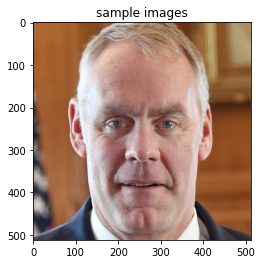

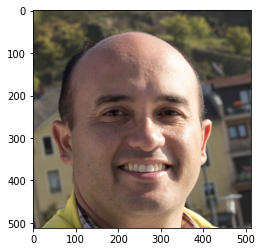

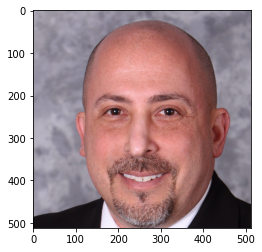

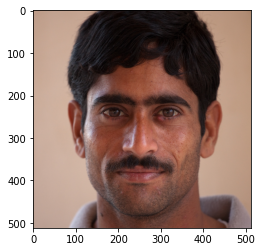

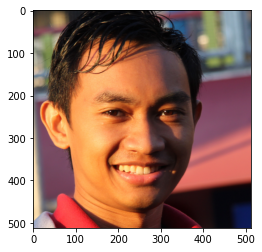

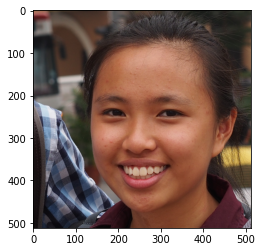

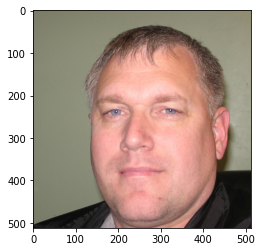

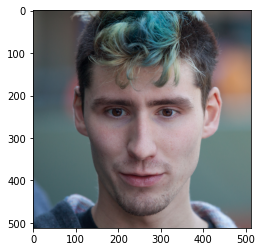

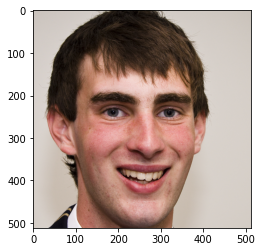

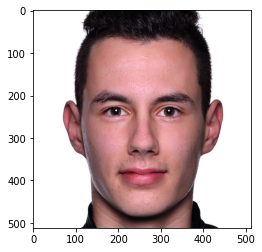

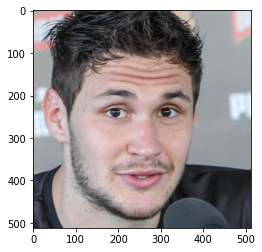

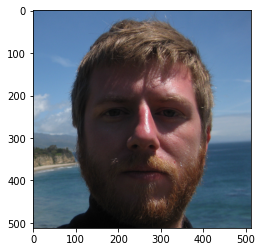

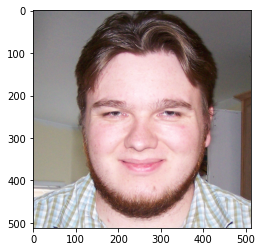

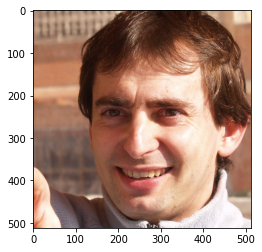

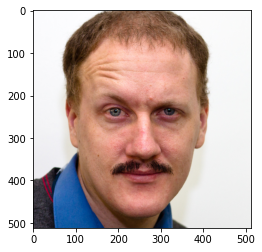

In [134]:
import matplotlib.pyplot as plt

def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))
    
IMG_SHAPE = x_train[0].shape
plt.title('sample images')

for i in np.arange(0,x_train.shape[0]):

        
    show_image(x_train[i])      
    plt.show()


In [109]:
def build_deep_autoencoder(img_shape):
    """PCA's deeper brother. See instructions above. Use `code_size` in layer definitions."""
    H,W,C = img_shape
    
    # encoder
    encoder = keras.models.Sequential()
    encoder.add(L.InputLayer(img_shape))
    
    ### YOUR CODE HERE: define encoder as per instructions above ###
    encoder.add(L.Conv2D(filters=32, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=64, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=256, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=512, kernel_size=(3, 3), activation='elu', padding='same'))




    # decoder
    decoder = keras.models.Sequential()

    ### YOUR CODE HERE: define decoder as per instructions above ###
    decoder.add(L.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=2, activation=None, padding='same'))
    
    return encoder, decoder

In [6]:
encoder,decoder = build_deep_autoencoder(IMG_SHAPE)

In [7]:
#autoencoder training

inp = L.Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = keras.models.Model(inp,reconstruction)

encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 256)       2

In [8]:
autoencoder.compile('nadam','mse')
autoencoder.fit(x=x_train,y=x_train,epochs=10000)

Epoch 1/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0701
Epoch 2/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0651
Epoch 3/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0614
Epoch 4/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 5/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0477
Epoch 6/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0351
Epoch 7/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0419
Epoch 8/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0279
Epoch 9/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0417
Epoch 10/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0230
Epoch 11/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0246
Epoch 12/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0340
Epoch 13/10000
1/1 [================

1/1 [==============================] - 0s 1ms/step - loss: 0.0448
Epoch 103/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 104/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0225
Epoch 105/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 106/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0158
Epoch 107/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.0158
Epoch 108/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0167
Epoch 109/10000
1/1 [==============================] - 0s 19ms/step - loss: 0.0227
Epoch 110/10000
1/1 [==============================] - 0s 16ms/step - loss: 0.0166
Epoch 111/10000
1/1 [==============================] - 0s 16ms/step - loss: 0.0214
Epoch 112/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0168
Epoch 113/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0175
Epoch 114/10000
1/1 [==

1/1 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 202/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.0075
Epoch 203/10000
1/1 [==============================] - 0s 20ms/step - loss: 0.0061
Epoch 204/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0066
Epoch 205/10000
1/1 [==============================] - 0s 25ms/step - loss: 0.0068
Epoch 206/10000
1/1 [==============================] - 0s 17ms/step - loss: 0.0079
Epoch 207/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0074
Epoch 208/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 209/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.0060
Epoch 210/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.0066
Epoch 211/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.0066
Epoch 212/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0078
Epoch 213/10000
1/1 [=

1/1 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 301/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0114
Epoch 302/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0134
Epoch 303/10000
1/1 [==============================] - 0s 17ms/step - loss: 0.0145
Epoch 304/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0192
Epoch 305/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 306/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0125
Epoch 307/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 308/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 309/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 310/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0108
Epoch 311/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 312/10000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 400/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 401/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 402/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 403/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0057
Epoch 404/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 405/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 406/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0063
Epoch 407/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0057
Epoch 408/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0060
Epoch 409/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.0056
Epoch 410/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 411/10000
1/1 [=======

1/1 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 499/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 500/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0049
Epoch 501/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0047
Epoch 502/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0051
Epoch 503/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0048
Epoch 504/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 505/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 506/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 507/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 508/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 509/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 510/10000
1/1 [========

1/1 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 598/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 599/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 600/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0047
Epoch 601/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0044
Epoch 602/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0050
Epoch 603/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 604/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 605/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0049
Epoch 606/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 607/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0045
Epoch 608/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0047
Epoch 609/10000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 697/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 698/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 699/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 700/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 701/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 702/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 703/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 704/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 705/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 706/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 707/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 708/10000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 797/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 798/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 799/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 800/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 801/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0040
Epoch 802/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 803/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 804/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 805/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 806/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 807/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 808/10000
1/1 [==========

Epoch 896/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 897/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 898/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 899/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 900/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 901/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0036
Epoch 902/10000
1/1 [==============================] - 0s 16ms/step - loss: 0.0039
Epoch 903/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0037
Epoch 904/10000
1/1 [==============================] - 0s 19ms/step - loss: 0.0038
Epoch 905/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.0034
Epoch 906/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.0035
Epoch 907/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0032
Epoch 908

1/1 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 996/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 997/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 998/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0031
Epoch 999/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 1000/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 1001/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 1002/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1003/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 1004/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 1005/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 1006/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0035
Epoch 1007/10000
1/1 [=

1/1 [==============================] - 0s 12ms/step - loss: 0.0029
Epoch 1094/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0031
Epoch 1095/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0031
Epoch 1096/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.0033
Epoch 1097/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 1098/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0034
Epoch 1099/10000
1/1 [==============================] - 0s 16ms/step - loss: 0.0033
Epoch 1100/10000
1/1 [==============================] - 0s 16ms/step - loss: 0.0034
Epoch 1101/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 1102/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 1103/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0029
Epoch 1104/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0030
Epoch 1105/1

1/1 [==============================] - 0s 13ms/step - loss: 0.0028
Epoch 1192/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0030
Epoch 1193/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0030
Epoch 1194/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 1195/10000
1/1 [==============================] - 0s 16ms/step - loss: 0.0031
Epoch 1196/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0032
Epoch 1197/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 1198/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 1199/10000
1/1 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 1200/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 1201/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.0027
Epoch 1202/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0028
Epoch 1203/100

KeyboardInterrupt: 

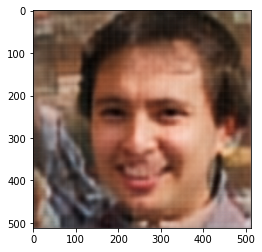

In [131]:
code1, code2 = encoder.predict(np.stack([x_train[5], x_train[13]]))
output_code = code1*(1-0.5) + code2*(0.5)
output_image = decoder.predict(output_code[None])[0]
show_image(output_image)

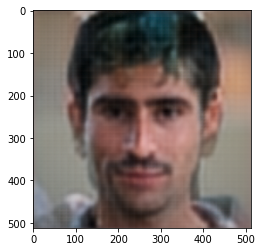

In [42]:
code1, code2 = encoder.predict(np.stack([x_train[7], x_train[3]]))
output_code = code1*(1-0.5) + code2*(0.5)
output_image = decoder.predict(output_code[None])[0]
show_image(output_image)

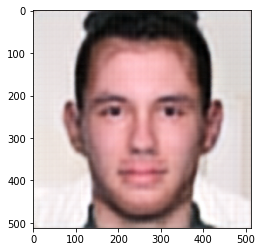

In [150]:
code1, code2 = encoder.predict(np.stack([x_train[12], x_train[9]]))
output_code = code1*(1-0.67) + code2*(0.67)
output_image = decoder.predict(output_code[None])[0]
show_image(output_image)

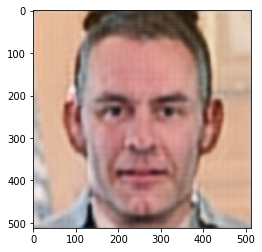

In [105]:
code1, code2 = encoder.predict(np.stack([x_train[0], x_train[9]]))
output_code = code1*(1-0.5) + code2*(0.5)
output_image = decoder.predict(output_code[None])[0]
show_image(output_image)

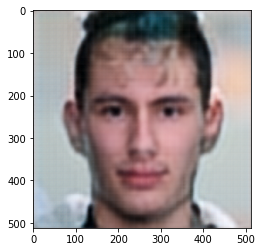

In [137]:
code1, code2 = encoder.predict(np.stack([x_train[7], x_train[9]]))
output_code = code1*(1-0.5) + code2*(0.5)
output_image = decoder.predict(output_code[None])[0]
show_image(output_image)